<a href="https://colab.research.google.com/github/nauhrsouza/Implementacoes_metodos_otimizacao/blob/main/m%C3%A9todo_do_gradiente_projetado_Bazaraa_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#bibliotecas

In [35]:
import sympy as sp
from math import*
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
eps=1E-6

#Gradiente projetado função Bazaraa


##Função exemplo

In [36]:
"""def funcao(x):
  return x[0]**2 + x[1]**2 - 2*x[0] - 4*x[1]

def gradiente(x):
  return np.array([2*x[0]-2,
          2*x[1]-4])

def restricao(x):
  return np.array([
    x[0]+x[1],
    x[0],
    x[1]
  ])

def matriz_restricao():
    return [[1,1],
            [-1,0],
            [0,-1]]

def vet_b():
  return [4,0,0]

def g1(x):
  return (4-x)


"""

'def funcao(x):\n  return x[0]**2 + x[1]**2 - 2*x[0] - 4*x[1]\n\ndef gradiente(x):\n  return np.array([2*x[0]-2,\n          2*x[1]-4])\n\ndef restricao(x):\n  return np.array([\n    x[0]+x[1],\n    x[0],\n    x[1]\n  ])\n\ndef matriz_restricao():\n    return [[1,1],\n            [-1,0],\n            [0,-1]]\n\ndef vet_b():\n  return [4,0,0]\n\ndef g1(x):\n  return (4-x)\n\n\n'

In [37]:

def funcao(x):
  return x[0]**2 + x[1]**2 +x[2]**2 +x[3]**2-2*x[0]-3*x[3]


def gradiente(x):
  return [2*x[0]-2,2*x[1],2*x[2],2*x[3]-3]


def restricao(x):
  return np.array([
      2*x[0]+x[1]+x[2]+4*x[3],
      x[0]+x[1]+2*x[2]+x[3],
      -x[0],-x[1],-x[2],-x[3]],dtype=float)

def matriz_restricao():
    return np.array(
          [[2,1,1,4],
            [1,1,2,1],
            [-1,0,0,0],
            [0,-1,0,0],
            [0,0,-1,0],
            [0,0,0,-1]],float)

def vet_b():
  return  np.array([7,6,0,0,0,0],float)

def g1(x):
  return  (7-2*x[0]-x[1]-x[2])/4

def g2(x):
  return 6-x[0]-x[1]-2*x[2]

In [38]:
"""
def funcao(x):
  return 2*x[0]**2 + 2*x[1]**2 -2*x[0]*x[1]-4*x[0]-6*x[1]


def gradiente(x):
  return [4*x[0]-2*x[1]-4,
          4*x[1]-2*x[0]-6]


def restricao(x):
  return np.array([
      x[0] + x[1],
      x[0] + 5 * x[1],
      -x[0],
      -x[1]],dtype=float)

def matriz_restricao():
    return np.array([[1,1],
            [1,5],
            [-1,0],
            [0,-1]],float)

def vet_b():
  return  np.array([2,5,0,0],float)

def g1(x):
  return 2-x

def g2(x):
  return (5-x)/5"""

'\ndef funcao(x):\n  return 2*x[0]**2 + 2*x[1]**2 -2*x[0]*x[1]-4*x[0]-6*x[1]\n\n\ndef gradiente(x):\n  return [4*x[0]-2*x[1]-4,\n          4*x[1]-2*x[0]-6]\n\n\ndef restricao(x):\n  return np.array([\n      x[0] + x[1],\n      x[0] + 5 * x[1],\n      -x[0],\n      -x[1]],dtype=float)\n\ndef matriz_restricao():\n    return np.array([[1,1],\n            [1,5],\n            [-1,0],\n            [0,-1]],float)\n\ndef vet_b():\n  return  np.array([2,5,0,0],float)\n\ndef g1(x):\n  return 2-x\n\ndef g2(x):\n  return (5-x)/5'

##Funções usadas no método

In [39]:
def inv(M):
  if np.ndim(M)==0:
    return M
  else:
    return np.linalg.inv(M)

def restricoes_ativas(x):
  ativas=[]
  for i in range(len(restricao(x))):
    if np.linalg.norm(restricao(x)[i] - vet_b()[i])<=eps:
      ativas.append(matriz_restricao()[i])
  return ativas

def vet_ativos(x):
  vet_ativas=[]
  for i in range(len(restricao(x))):
    if np.linalg.norm(restricao(x)[i]- vet_b()[i])<=eps:
      vet_ativas.append(vet_b()[i])
  return vet_ativas

def restricoes_inativas(x):
  inativas=[]
  for i in range(len(restricao(x))):
    if np.linalg.norm(restricao(x)[i]- vet_b()[i])>eps:
      inativas.append(matriz_restricao()[i])
  return inativas

def vet_inativos(x):
  vet_inativas=[]
  for i in range(len(restricao(x))):
    if np.linalg.norm(restricao(x)[i]- vet_b()[i])>eps:
      vet_inativas.append(vet_b()[i])
  return vet_inativas

def projecao(mat):
    return np.round(np.eye(len(mat[0])) - np.dot(np.array(mat).T,np.dot(inv(np.dot(mat,np.array(mat).T)),mat)),6)

def direcao(x,mat):
    if restricoes_ativas(x)!=[]:
      return np.round(-np.dot(projecao(mat),gradiente(x)),6)
    else:
      if np.all(gradiente(x)==0):
        print("Não há restrições ativas")
      else:
        return np.dot(-1,gradiente(x))


def lambda_k(x,mat):
    l=np.array([],dtype=float)
    b=vet_inativos(x)-np.dot(restricoes_inativas(x),x)
    print(b)
    d=np.dot(restricoes_inativas(x),direcao(x,mat))
    print(d)
    for i in range(len(b)):
      if d[i]>0:
        l = np.append(b[i]/d[i],l)
      else:
        np.append(0,l)

    return np.min(l)

def multiplicador_lagrange(mat,grad):
    mat = np.array(mat)
    return np.round(-np.dot(np.dot(inv(np.dot(mat,mat.T)),mat),grad),6)

def deleta_linha(mat,grad):
    mat = np.delete(mat,multiplicador_lagrange(mat,grad).argmin(),0)
    return mat

##Buscas

###Busca da Seção áurea

In [40]:
eps = 1E-5
bMax = 10**8
theta1 = (3-sqrt(5))/2
theta2 = 1-theta1
def phi_t(t,x,d):
    t = x + np.dot(t,d)
    phi =  funcao(t)
    return phi
def aurea(x,d,rho):
    #Obtenção do intervalo [a,b]
    a = 0
    s = rho
    b = 2*rho
    phib = phi_t(b, x,d)
    phis = phi_t(s, x,d)
    if phib < phis and 2*b < bMax:
        a = s
        s = b
        b = 2*b
        phis = phib
        phib = phi_t(b, x,d)
    #Obtenção de t em [a,b]
    u = a + theta1 * (b - a)
    v = a + theta2 * (b - a)
    phiu = phi_t(u, x,d)
    phiv = phi_t(v, x,d)
    if (b-a) > eps:
        if phiu < phiv:
            b = v
            v = u
            u = a + theta1 * (b - a)
            phiv = phiu
            phiu = phi_t(u, x,d)
        else:
            a = u
            u = v
            v = a + theta2 * (b - a)
            phiu = phiv
            phiv = phi_t(v, x,d)
    t_k = (u+v)/2
    return  t_k

###Busca de Armijo

In [41]:
def armijo(x,d,l=float, gama=0.5,  eta= 0.1):
  l_min=eps
  gd = np.dot(gradiente(x), d)
  if gd > 0:
    return 0
  f = funcao(x)
  while l > l_min:
    f_t =funcao(x + np.dot(l,d))
    if f_t <= f+ eta*l*gd:
        return l
    l *= gama

  return l

##Método

In [42]:
def metodo(x,m,recursion_depth=0):
  """
  Applies the gradient projection method with a recursion depth limit.

  Args:
    x_k: Current point.
    m: Active constraints matrix.
    recursion_depth: Current recursion depth.

  Returns:
    The optimal point x_k.
  """

  # Maximum recursion depth to avoid infinite loops
  max_recursion_depth = 1000  # Reduced to 100 to prevent excessive recursion
  #if restricoes_ativas(x)!=[]:
  grad_k.append(np.round(gradiente(x),5))
  d_k.append(direcao(x, m))
  a_1.append(m)
  proj.append(projecao(m))
  kkt.append(multiplicador_lagrange(m, gradiente(x)))

  if np.linalg.norm(direcao(x, m)) > eps:

    projecao_direcao = np.dot(projecao(m), direcao(x, m))

    l_max = lambda_k(x, m)
    print("max",l_max)
    l_k = armijo(x, direcao(x, m), l_max)
    print("lk",l_k)
    l.append(l_k)

    x = x + np.dot(l_k, direcao(x, m))
    p_k.append(x)
  print("d",direcao(x,m))
  f_x.append(funcao(x))
  if np.min(multiplicador_lagrange(m, gradiente(x))) >= eps:
    return x
  else:
    m = deleta_linha(restricoes_ativas(x), gradiente(x))
    if len(m) == 0:
      # If no active constraints, try with original constraints
      # Check if the point is feasible before recursing
      if all(restricao(x) <= 0) and recursion_depth < max_recursion_depth:  # Added feasibility check
        return metodo(x, restricoes_ativas(x), recursion_depth + 1)
      else:
        print("Maximum recursion depth reached or infeasible point. Returning current solution.")
        return x
    else:
      if recursion_depth < max_recursion_depth:
        return metodo(x, m, recursion_depth + 1)
      else:
        print("Maximum recursion depth reached. Returning current solution.")
        return x


#Executável

In [43]:
#x=[0,0]
x=[2,2,1,0]
x_k=np.array(x,float)
p_k=[]
d_k=[]
grad_k=[]
f_x=[]
a_1=[]
proj=[]
kkt=[]
l=[]
p_k.append(x_k)
f_x.append(funcao(x_k))
l.append(0)
metodo(x_k,restricoes_ativas(x_k))

[2. 2. 1.]
[-0.727272  2.18182  -0.727272]
max 0.9166659027784143
lk 0.45833295138920715
d [ 0.060606 -0.181821  0.060606 -0.      ]
[2.33333272 1.         1.33333272]
[ 2.42009   0.69863  -0.990867]
max 0.9641512184351537
lk 0.48207560921757686
d [-0.086758 -0.025046  0.035522  0.040759]
[1.16666636 0.66320752 1.81100553 0.54811274]
[ 0.515151  1.417322  3.712918 -1.540135]
max 0.4679300237577095
lk 0.4679300237577095
d [-0.033042 -0.090909 -0.238149  0.098786]


array([0.92561174, 0.        , 0.07361973, 1.26878814])

##df exemplo 2

In [44]:
df1=pd.DataFrame(data = {'x1':np.array(p_k)[:,0], 'x2':np.array(p_k)[:,1],'x3':np.array(p_k)[:,2], 'x4':np.array(p_k)[:,3],'lambda':l})
df1

,x1,x2,x3,x4,lambda
0,2.000000,2.000000,1.000000,0.000000,0.000000
1,2.333333,1.000000,1.333333,0.000000,0.458333
2,1.166666,0.663208,1.811006,0.548113,0.482076
3,0.925612,0.000000,0.073620,1.268788,0.467930


In [45]:
df1.to_latex(index=False)

'\\begin{tabular}{rrrrr}\n\\toprule\nx1 & x2 & x3 & x4 & lambda \\\\\n\\midrule\n2.000000 & 2.000000 & 1.000000 & 0.000000 & 0.000000 \\\\\n2.333333 & 1.000000 & 1.333333 & 0.000000 & 0.458333 \\\\\n1.166666 & 0.663208 & 1.811006 & 0.548113 & 0.482076 \\\\\n0.925612 & 0.000000 & 0.073620 & 1.268788 & 0.467930 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [46]:
df2=pd.DataFrame(data = {'Restrições ativas':a_1,'Projeção':proj}, index = pd.Index([i for i in range(len(proj))]))
df2

,Restrições ativas,Projeção
0,"[[2.0, 1.0, 1.0, 4.0], [1.0, 1.0, 2.0, 1.0], [...","[[0.090909, -0.272727, 0.090909, 0.0], [-0.272..."
1,"[[2.0, 1.0, 1.0, 4.0], [1.0, 1.0, 2.0, 1.0]]","[[0.808219, -0.123288, -0.178082, -0.328767], ..."
2,"[[2.0, 1.0, 1.0, 4.0]]","[[0.818182, -0.090909, -0.090909, -0.363636], ..."


In [47]:
df2.to_latex(index=False)

'\\begin{tabular}{ll}\n\\toprule\nRestrições ativas & Projeção \\\\\n\\midrule\n[array([2., 1., 1., 4.]), array([1., 1., 2., 1.]), array([ 0.,  0.,  0., -1.])] & [[ 0.090909 -0.272727  0.090909  0.      ]\n [-0.272727  0.818182 -0.272727  0.      ]\n [ 0.090909 -0.272727  0.090909  0.      ]\n [ 0.        0.        0.        0.      ]] \\\\\n[[2. 1. 1. 4.]\n [1. 1. 2. 1.]] & [[ 0.808219 -0.123288 -0.178082 -0.328767]\n [-0.123288  0.849315 -0.328767 -0.068493]\n [-0.178082 -0.328767  0.191781  0.123288]\n [-0.328767 -0.068493  0.123288  0.150685]] \\\\\n[[2. 1. 1. 4.]] & [[ 0.818182 -0.090909 -0.090909 -0.363636]\n [-0.090909  0.954545 -0.045455 -0.181818]\n [-0.090909 -0.045455  0.954545 -0.181818]\n [-0.363636 -0.181818 -0.181818  0.272727]] \\\\\n\\bottomrule\n\\end{tabular}\n'

In [48]:
df3=pd.DataFrame(data = {'Restrições ativas':a_1,'Projeção':proj ,'Gradiente':grad_k,'Direção':d_k,'Multiplicadores':kkt})
df3

,Restrições ativas,Projeção,Gradiente,Direção,Multiplicadores
0,"[[2.0, 1.0, 1.0, 4.0], [1.0, 1.0, 2.0, 1.0], [...","[[0.090909, -0.272727, 0.090909, 0.0], [-0.272...","[2.0, 4.0, 2.0, -3.0]","[0.727272, -2.18182, 0.727272, -0.0]","[-0.909091, -0.909091, -7.545455]"
1,"[[2.0, 1.0, 1.0, 4.0], [1.0, 1.0, 2.0, 1.0]]","[[0.808219, -0.123288, -0.178082, -0.328767], ...","[2.66667, 2.0, 2.66667, -3.0]","[-2.42009, -0.69863, 0.990867, 1.136985]","[1.054794, -2.356164]"
2,"[[2.0, 1.0, 1.0, 4.0]]","[[0.818182, -0.090909, -0.090909, -0.363636], ...","[0.33333, 1.32642, 3.62201, -1.90377]","[-0.515151, -1.417322, -3.712918, 1.540135]",[0.090909]


In [49]:
df3.to_latex(index=False)

'\\begin{tabular}{lllll}\n\\toprule\nRestrições ativas & Projeção & Gradiente & Direção & Multiplicadores \\\\\n\\midrule\n[array([2., 1., 1., 4.]), array([1., 1., 2., 1.]), array([ 0.,  0.,  0., -1.])] & [[ 0.090909 -0.272727  0.090909  0.      ]\n [-0.272727  0.818182 -0.272727  0.      ]\n [ 0.090909 -0.272727  0.090909  0.      ]\n [ 0.        0.        0.        0.      ]] & [ 2.  4.  2. -3.] & [ 0.727272 -2.18182   0.727272 -0.      ] & [-0.909091 -0.909091 -7.545455] \\\\\n[[2. 1. 1. 4.]\n [1. 1. 2. 1.]] & [[ 0.808219 -0.123288 -0.178082 -0.328767]\n [-0.123288  0.849315 -0.328767 -0.068493]\n [-0.178082 -0.328767  0.191781  0.123288]\n [-0.328767 -0.068493  0.123288  0.150685]] & [ 2.66667  2.       2.66667 -3.     ] & [-2.42009  -0.69863   0.990867  1.136985] & [ 1.054794 -2.356164] \\\\\n[[2. 1. 1. 4.]] & [[ 0.818182 -0.090909 -0.090909 -0.363636]\n [-0.090909  0.954545 -0.045455 -0.181818]\n [-0.090909 -0.045455  0.954545 -0.181818]\n [-0.363636 -0.181818 -0.181818  0.272727

In [50]:
df4=pd.DataFrame(data = {'f(x1,x2,x3,x4)':f_x})
df4

,"f(x1,x2,x3,x4)"
0,5.000000
1,3.555552
2,1.403452
3,-3.185588


In [51]:
df4.to_latex(index=False)

'\\begin{tabular}{r}\n\\toprule\nf(x1,x2,x3,x4) \\\\\n\\midrule\n5.000000 \\\\\n3.555552 \\\\\n1.403452 \\\\\n-3.185588 \\\\\n\\bottomrule\n\\end{tabular}\n'

##dfs default

In [52]:
df1=pd.DataFrame(data = {'x1':np.array(p_k)[:,0], 'x2':np.array(p_k)[:,1],'f(x1,x2)':f_x, 'Gradiente':grad_k,'Direção':d_k,'Multiplicadores':kkt,'lambda':l}, index = pd.Index([i for i in range(len(p_k))]))
df1

ValueError: Length of values (3) does not match length of index (4)

In [ ]:
df2=pd.DataFrame(data = {'Restrições ativas':a_1,'Projeção':proj}, index = pd.Index([i for i in range(len(proj))]))
df2

#Gerando graficos

In [ ]:
px=[]
py=[]
for i in p_k:
  px.append(i[0])
  py.append(i[1])

dx=[]
dy=[]
for i in d_k:
  dx.append(i[0])
  dy.append(i[1])

gradx=[]
grady=[]
for i in grad_k:
  gradx.append(i[0])
  grady.append(i[1])

In [59]:
def plot_function(f, title, dom = np.linspace(-5, 5, 500), angle = (30,40)):

  """
    Função que plota gráficos em 2-d ou 3-d.

    Parâmetros
    ----------------------------------------
    f : callable
        Função objetivo (função custo).
    title : str
        Título do gráfico
    ndim : str (2 ou 3)
        Dimensão da função
    dom : list or np.arange or np.linspace, opcional
        Domínio da função desejado
    angle : tuple,  opcional
        Ângulo para ver o gráfico. Padrão = (20, 20)
    Saída
    ----------------------------------------
    plot
  """

  plt.style.use('fivethirtyeight')

  #3-d plot: z = f(x, y)

  x, y = dom, dom
  X, Y = np.meshgrid(x, y)
  Z = f([X, Y])

  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(projection = '3d')
  ax.plot(np.array(p_k)[:,0],np.array(p_k)[:,1], linestyle='--', marker='o', color='black', linewidth = 3)
  ax.plot(np.array(p_k)[-1,0], np.array(p_k)[-1,1], 'ro', markersize = 11)
  ax.set_title(title)
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  ax.set_zlabel('$f(x_1, x_2)$')
  ax.plot_surface(X, Y, Z, cmap='jet')
  ax.view_init(angle[0], angle[1])
  plt.tight_layout()
  plt.show()

In [55]:
def plot_results(f, dim=[np.linspace(-1, 7, 500), np.linspace(-1, 7, 500)]):
    """
    Função que plota os resultados.

    Parâmetros
    ----------------------------------------
    f : callable
        Função objetivo (função custo).
    dim : list, opcional
        Valores de x e y para plotar as curvas de nível.
    Saída
    ----------------------------------------
    plot
    """
    plt.style.use('fivethirtyeight')

    title = 'Gradiente Projetado'

    # z = f(x,y)
    x, y = dim[0], dim[1]
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    fig, (ax1) = plt.subplots(1, figsize=(15, 8))
    plt.suptitle(title, y=1.05)

    # Adiciona eixos destacados
    ax1.spines['left'].set_position('zero')
    ax1.spines['bottom'].set_position('zero')
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['left'].set_color('black')
    ax1.spines['bottom'].set_color('black')
    ax1.set_axisbelow(False)

    # Calcula a região factível
    x_grid, y_grid = np.mgrid[dim[0][0]:dim[0][-1]:100j, dim[1][0]:dim[1][-1]:100j]
    pontos = np.vstack([x_grid.ravel(), y_grid.ravel()]).T
    valores_restricoes = np.array([restricao(ponto) -vet_b()for ponto in pontos])
    pontos_facteis = np.all(valores_restricoes <= 0, axis=1)

    # Plota a região factível
    ax1.scatter(pontos[pontos_facteis, 0], pontos[pontos_facteis, 1], color='green', alpha=0.5, label='Região Factível')

    # Curvas de nível
    ax1.plot(np.array(p_k)[:, 0], np.array(p_k)[:, 1], linestyle='--', marker='o', color='black', linewidth=3)
    ax1.plot(np.array(p_k)[-1, 0], np.array(p_k)[-1, 1], 'ro', markersize=11, label='Último ponto')
    ax1.set(title='Caminho durante a otimização - Curvas de Nível', xlabel='x1', ylabel='x2')
    CS = ax1.contour(X, Y, Z, 10, cmap='jet')
    ax1.clabel(CS, fontsize='smaller', fmt='%1.2f')
    ax1.legend()


    plt.show()

In [53]:
def plot_f_obj(f_x):
    """
    Plota o valor da função custo durante as iterações.

    Parâmetros
    ----------------------------------------
    f_x : array
        Valores da função custo em cada iteração.
    """
    fig, ax2 = plt.subplots(figsize=(8, 8))
    # Valor da função custo em cada iteração
    ax2.plot(f_x, linestyle='--', marker='o', color='black')
    ax2.plot(len(f_x) - 1, f_x[-1], 'ro', markersize=11,label=f'Valor ótimo({f_x[-1]:.2f})')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.set(title='Valor da função custo durante a otimização', xlabel='Iterações', ylabel='Valor da função objetivo')
    ax2.legend()
    plt.show()


In [74]:
def plot_lambda(l):
    """
    Plota o valor da função custo durante as iterações.

    Parâmetros
    ----------------------------------------
    f_x : array
        Valores da função custo em cada iteração.
    """
    fig, ax2 = plt.subplots(figsize=(8, 8))
    # Valor da função custo em cada iteração
    ax2.plot(l, linestyle='--', marker='o', color='black')
    ax2.plot(len(l) - 1, l[-1], 'ro', markersize=11,label=f'Valor final lambda({l[-1]:.2f})')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.set(title='Valor de Lambda a cada iteração', xlabel='Iterações', ylabel='Valores de lambda')
    ax2.legend()
    plt.show()

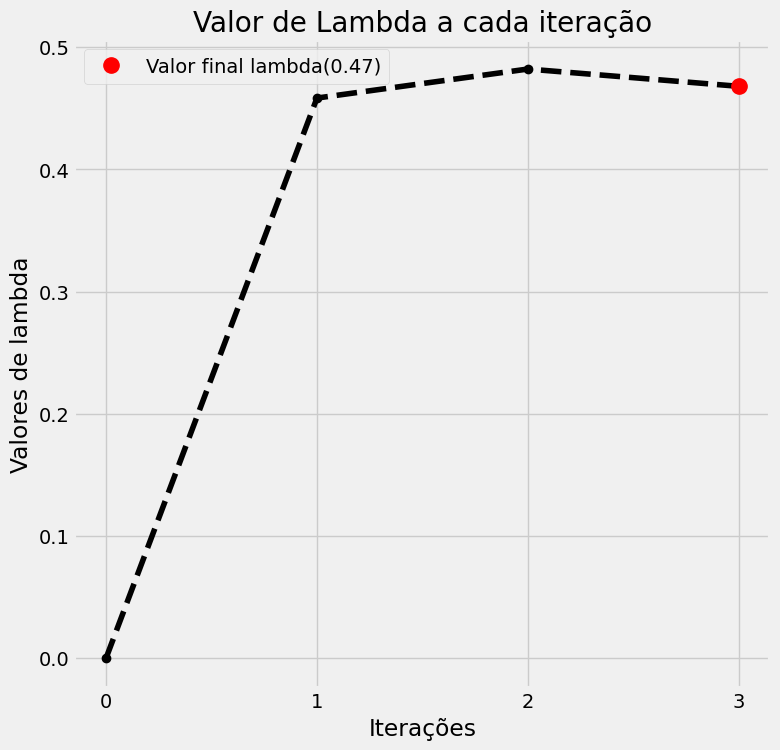

In [75]:
 plot_lambda(l)

#Plotando

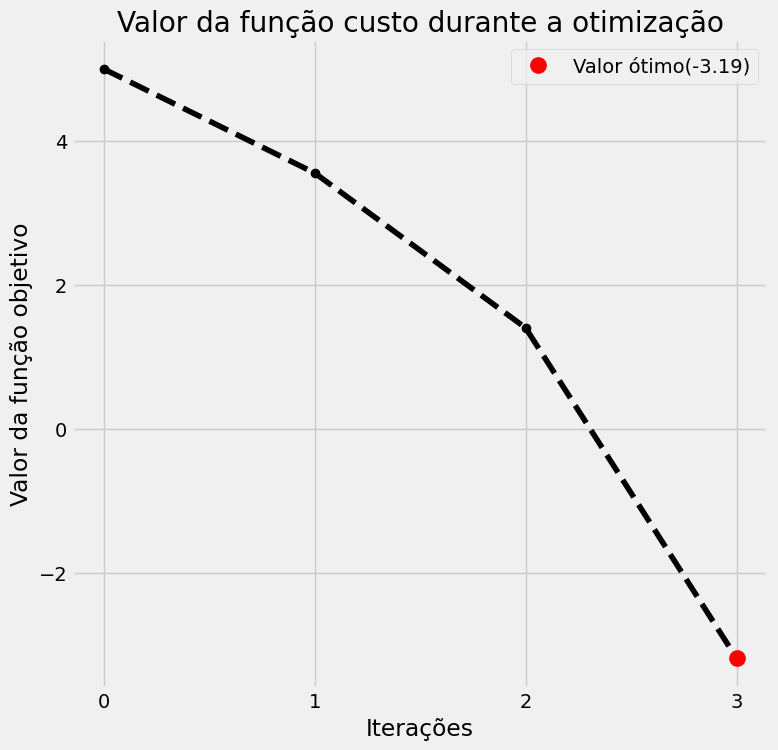

In [60]:
 plot_f_obj(f_x)

In [57]:
plot_results(funcao)

IndexError: list index out of range

In [58]:
plot_function(funcao, title = 'F(x,y)')

IndexError: list index out of range